# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
#import libraries and dataset

import pandas as pd
import numpy as np

#load the dataset

data = '/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/1st lab/amz_uk_price_prediction_dataset.csv'

df = pd.read_csv(data)

In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

### 1. Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

### 2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

### 3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [3]:
#1. Creating a cross table with the columns 'category' and 'isBestSeller'

df_crosstab = pd.crosstab(df['category'], df['isBestSeller'])

df_crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
df_crosstab.dtypes

isBestSeller
False    int64
True     int64
dtype: object

In [13]:
# Sort the DataFrame by the number of best-sellers (True values)
sorted_df_crosstab = df_crosstab.sort_values(by=True, ascending=False)

# Print the sorted DataFrame
print("\nSorted Crosstab by Number of Best-Sellers:")
print(sorted_df_crosstab)


Sorted Crosstab by Number of Best-Sellers:
isBestSeller                  False  True 
category                                  
Grocery                        9008    556
Health & Personal Care         9017    552
Baby                          14709    341
Sports & Outdoors            835935    330
Power & Hand Tools             8353    306
...                             ...    ...
Downhill Ski Boots             1284      0
Digital Frames                  774      0
Motorbike Chassis               107      0
Motorbike Drive & Gears         250      0
eBook Readers & Accessories     246      0

[296 rows x 2 columns]


In [14]:
# Limit the sorted_df_crosstab to the top 10 categories

top_10_categories = sorted_df_crosstab.head(10)

# Print the top_10_categories

top_10_categories

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [15]:
#2 Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(df_crosstab)

print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

# A p-value of 0.0 indicates that the best-seller distribution is not independent of the product category.

# Compute Cramér's V to understand the strength of association between best-seller status and category.

import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v(df_crosstab)


# The Cramers V value of 0.12 indicates a small to moderate association between best-seller status and category.

Chi-square statistic: 36540.20270061387
p-value: 0.0


0.12178835496344273

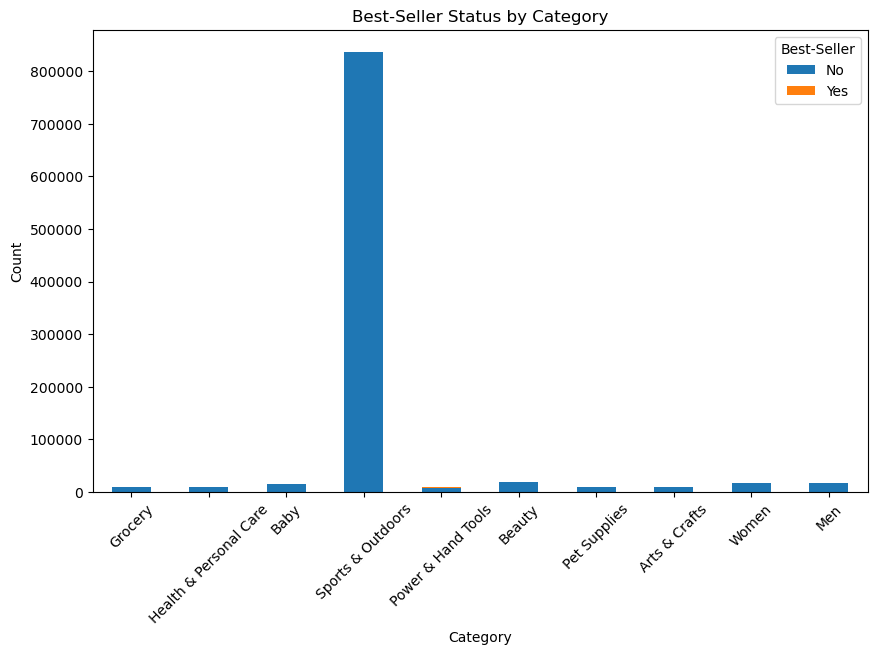

In [15]:
# 3. Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

import matplotlib.pyplot as plt

top_10_categories.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Best-Seller Status by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Best-Seller', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

### 0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

### 1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

### 2. Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

### 3. Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [16]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [17]:
# IQR

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')

Q1: 9.99
Q3: 45.99
IQR: 36.0


In [18]:
# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Q1: 9.99, Q3: 45.99, IQR: 36.0
Lower Bound: -44.01, Upper Bound: 99.99000000000001


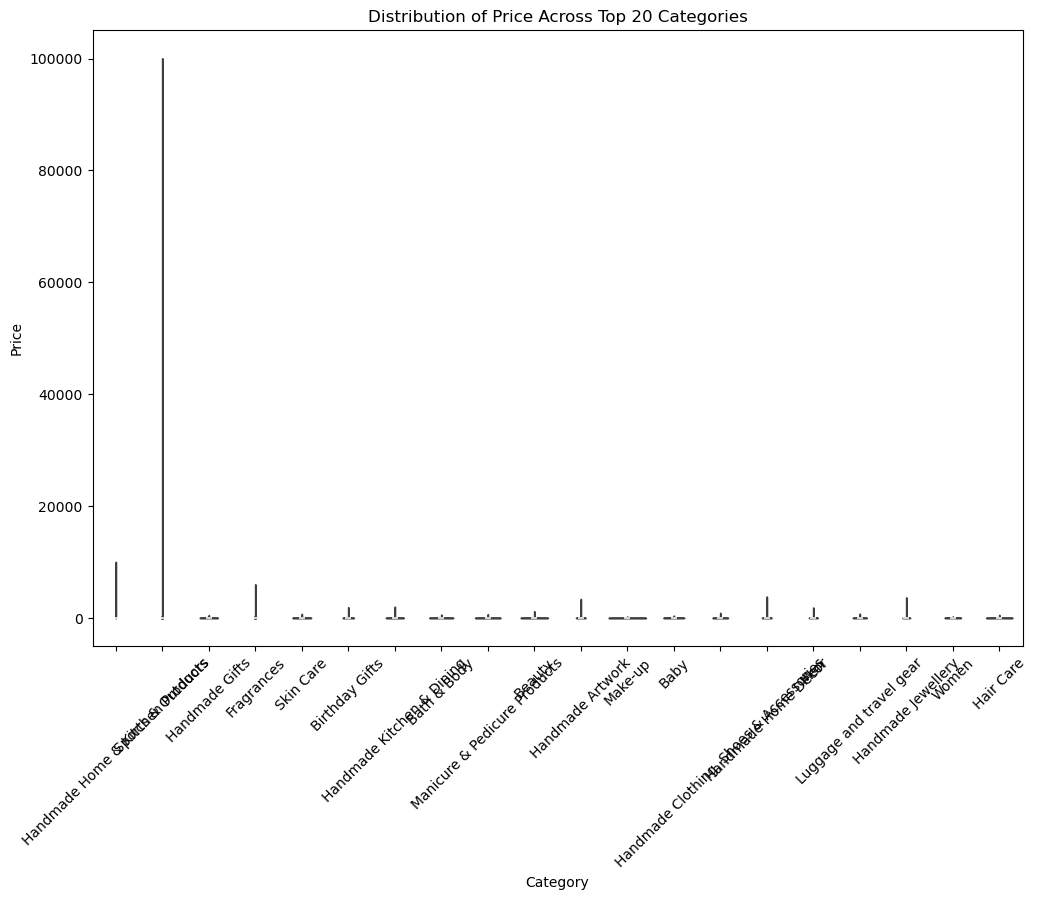

In [19]:
# 1. Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

# Filter out the top 20 categories based on count

top_20_categories = df['category'].value_counts().head(20).index

# Filter the DataFrame for the top 20 categories

df_top_20_categories = df[df['category'].isin(top_20_categories)]

# Create a violin plot to visualize the distribution of price across different product categories

import seaborn as sns

plt.figure(figsize=(12, 8))

sns.violinplot(x='category', y='price', data=df_top_20_categories)

plt.title('Distribution of Price Across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()



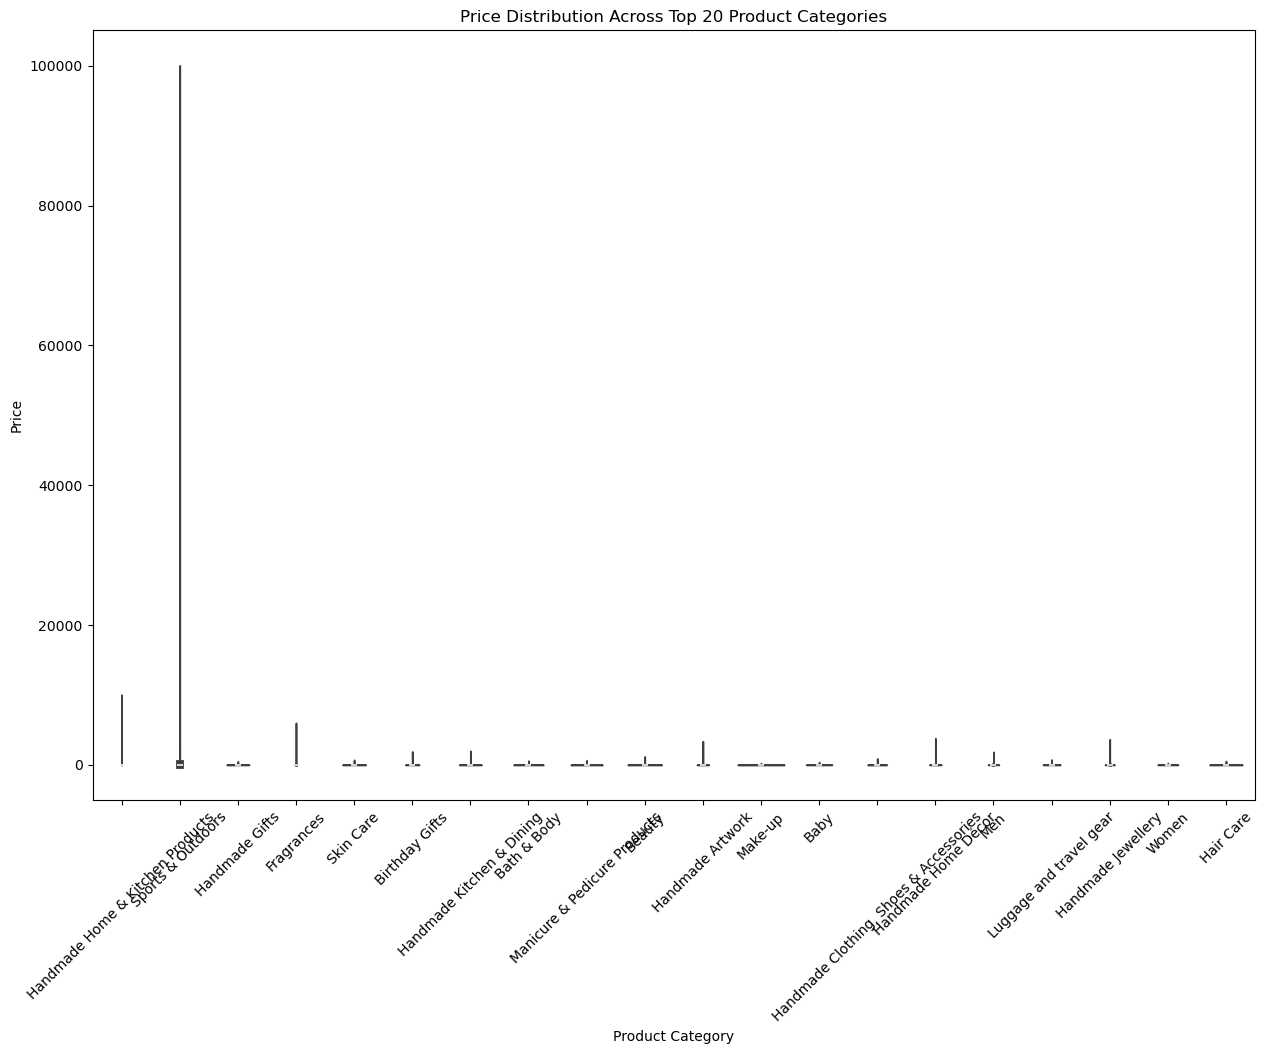

Category with the highest median price:
Laptops 1042.725

Median prices for all categories:
category
Laptops                      1042.725
Desktop PCs                   810.400
Snowboards                    366.725
Home Audio Record Players     326.080
3D Printers                   319.000
                               ...   
Adapters                        7.050
Make-up                         7.000
Signs & Plaques                 6.990
Arts & Crafts                   5.990
Office Paper Products           4.380
Name: price, Length: 296, dtype: float64


In [20]:
# Filter top 20 categories based on count
top_categories = df['category'].value_counts().nlargest(20).index
df_top_categories = df[df['category'].isin(top_categories)]

# Violin plot for the top 20 categories
plt.figure(figsize=(15, 10))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()

# Calculate the median price for each category
category_medians = df.groupby('category')['price'].median().sort_values(ascending=False)

# Display the category with the highest median price
print("Category with the highest median price:")
print(category_medians.idxmax(), category_medians.max())

# Display the median prices for all categories
print("\nMedian prices for all categories:")
print(category_medians)

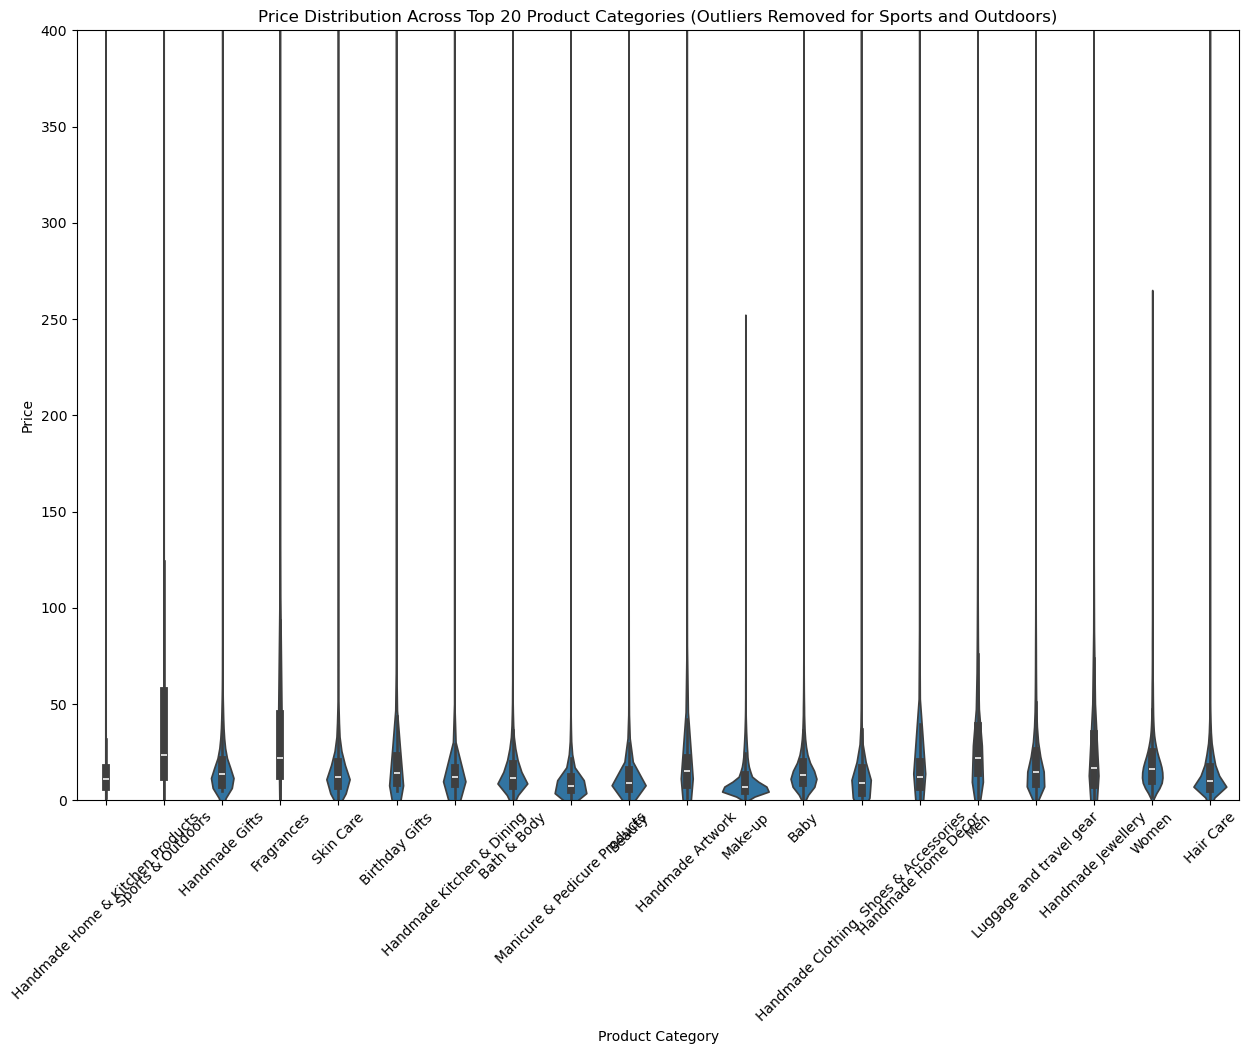

Category with the highest median price:
Laptops 1042.725

Median prices for all categories:
category
Laptops                      1042.725
Desktop PCs                   810.400
Snowboards                    366.725
Home Audio Record Players     326.080
3D Printers                   319.000
                               ...   
Adapters                        7.050
Make-up                         7.000
Signs & Plaques                 6.990
Arts & Crafts                   5.990
Office Paper Products           4.380
Name: price, Length: 296, dtype: float64


In [21]:
# Filter top 20 categories based on count
top_categories = df['category'].value_counts().nlargest(20).index
df_top_categories = df[df['category'].isin(top_categories)]

# Remove outliers specifically for the "Sports and Outdoors" category
def remove_outliers(df, category):
    Q1 = df[df['category'] == category]['price'].quantile(0.25)
    Q3 = df[df['category'] == category]['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df['category'] == category) & ((df['price'] < lower_bound) | (df['price'] > upper_bound)))]

df_filtered = remove_outliers(df_top_categories, 'Sports and Outdoors')

# Violin plot for the top 20 categories
plt.figure(figsize=(15, 10))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Top 20 Product Categories (Outliers Removed for Sports and Outdoors)')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.ylim(0, 400)  # Adjust y-axis limit to make the plot more readable
plt.show()

# Calculate the median price for each category
category_medians = df.groupby('category')['price'].median().sort_values(ascending=False)

# Display the category with the highest median price
print("Category with the highest median price:")
print(category_medians.idxmax(), category_medians.max())

# Display the median prices for all categories
print("\nMedian prices for all categories:")
print(category_medians)

Category with the highest average price:
Laptops 1087.987826986755

Average prices for all categories:
category
Laptops                  1087.987827
3D Printers              1018.036129
Desktop PCs               926.816064
Home Office Furniture     622.135898
Test & Measurement        559.382973
                            ...     
Bedding Accessories         8.835220
Adapters                    8.750197
Signs & Plaques             8.275136
Arts & Crafts               8.182523
Office Paper Products       7.047684
Name: price, Length: 296, dtype: float64


/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_29890/1297954269.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='price', data=df_top_10_categories, estimator=np.mean, ci=None)


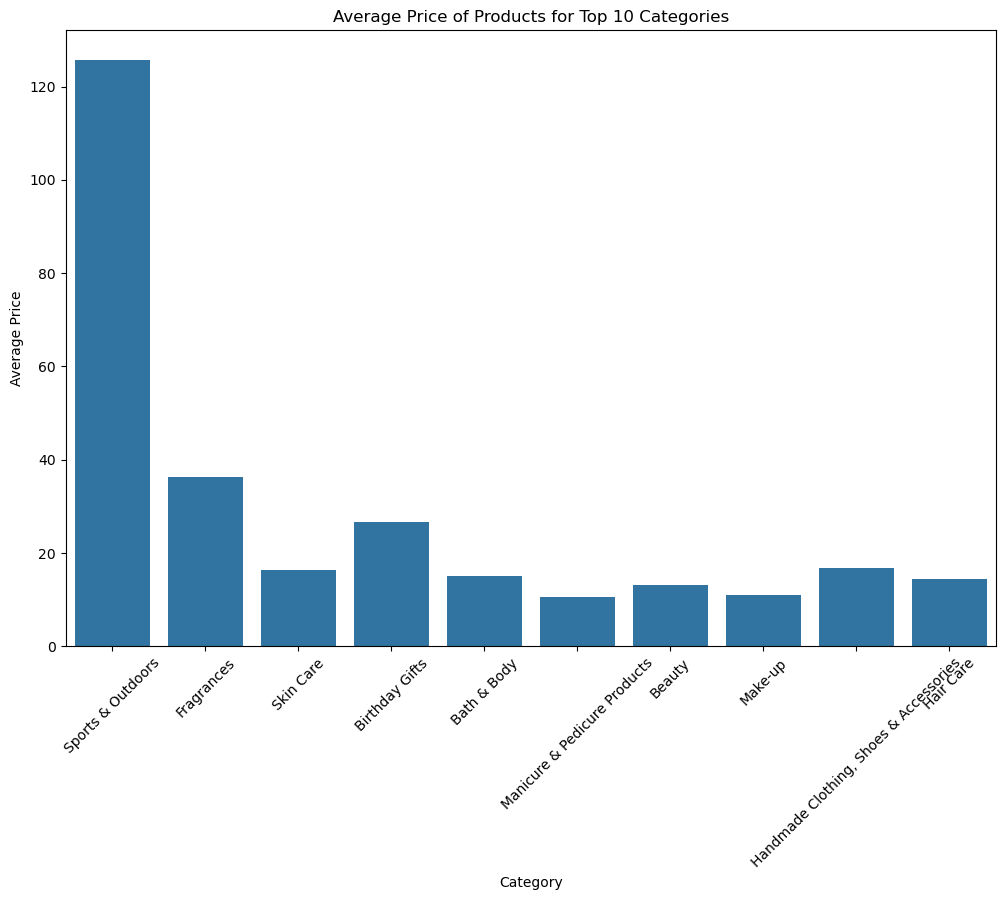

In [22]:
#Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.

# Calculate the average price for each category

category_avg_prices = df.groupby('category')['price'].mean().sort_values(ascending=False)

# Display the category with the highest average price

print("Category with the highest average price:")

print(category_avg_prices.idxmax(), category_avg_prices.max())

# Display the average prices for all categories

print("\nAverage prices for all categories:")
print(category_avg_prices)

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count)

top_10_categories = df['category'].value_counts().head(10).index

df_top_10_categories = df[df['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))

sns.barplot(x='category', y='price', data=df_top_10_categories, estimator=np.mean, ci=None)

plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


In [24]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


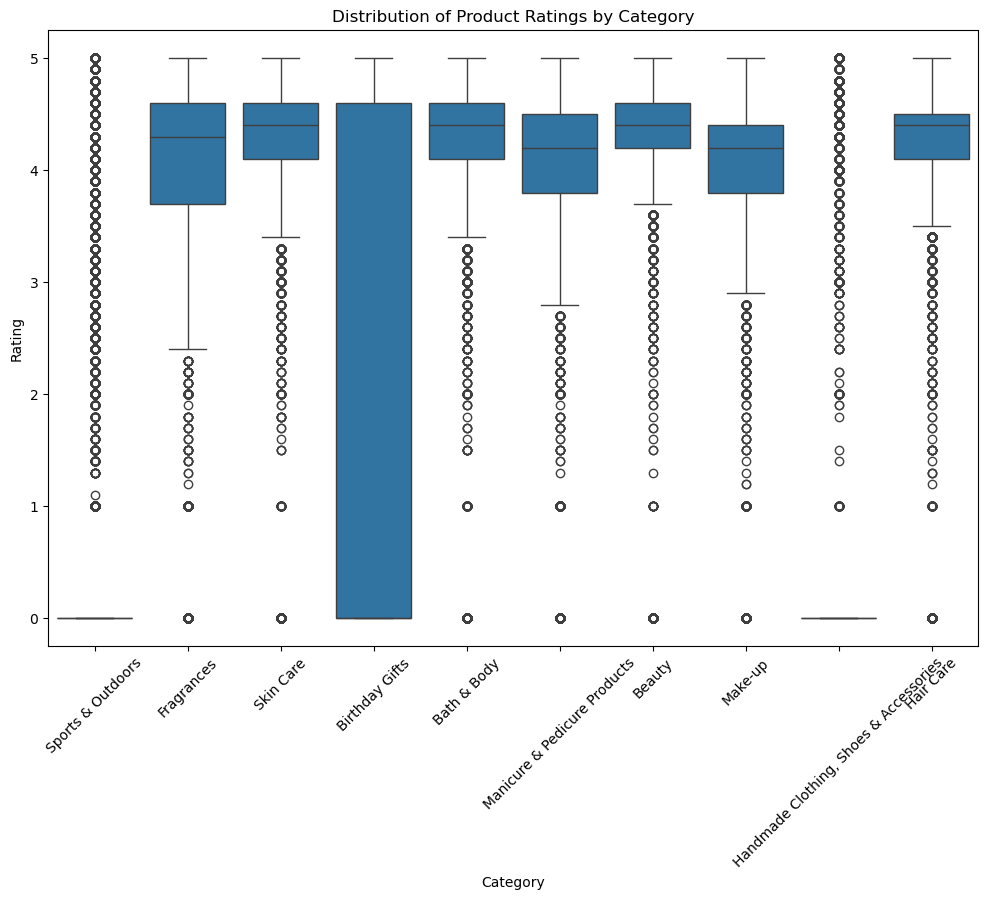

Category with the highest median rating:
Computer Memory 4.7

Median ratings for all categories:
category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64


In [26]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

# Filter out the top 10 categories based on count

top_10_categories = df['category'].value_counts().head(10).index

df_top_10_categories = df[df['category'].isin(top_10_categories)]

# Create side-by-side box plots to visualize the distribution of product ratings based on their category

plt.figure(figsize=(12, 8))

sns.boxplot(x='category', y='stars', data=df_top_10_categories)

plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate the median rating for each category

category_medians = df.groupby('category')['stars'].median().sort_values(ascending=False)

# Display the category with the highest median rating

print("Category with the highest median rating:")
print(category_medians.idxmax(), category_medians.max())

# Display the median ratings for all categories

print("\nMedian ratings for all categories:")

print(category_medians)

## Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

### 1. Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

### 2. Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [28]:
# 1. Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?

# Calculate the correlation coefficient between price and stars

correlation = df['price'].corr(df['stars'])

print(f'Correlation between price and stars: {correlation}')

# A correlation coefficient of -0.1 indicates a weak negative correlation between price and stars.

Correlation between price and stars: -0.12490673262148386


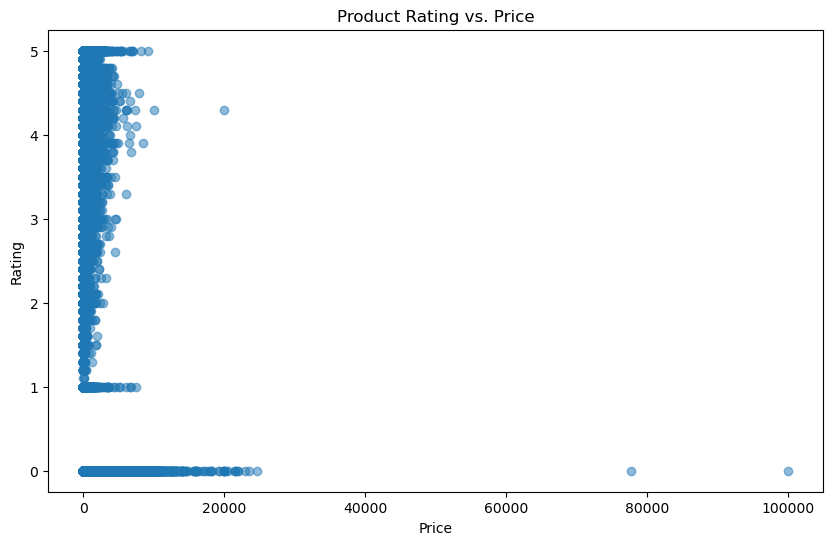

In [29]:
# 2. Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

# Create a scatter plot to visualize the relationship between product rating and price

plt.figure(figsize=(10, 6))

plt.scatter(df['price'], df['stars'], alpha=0.5)

plt.title('Product Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

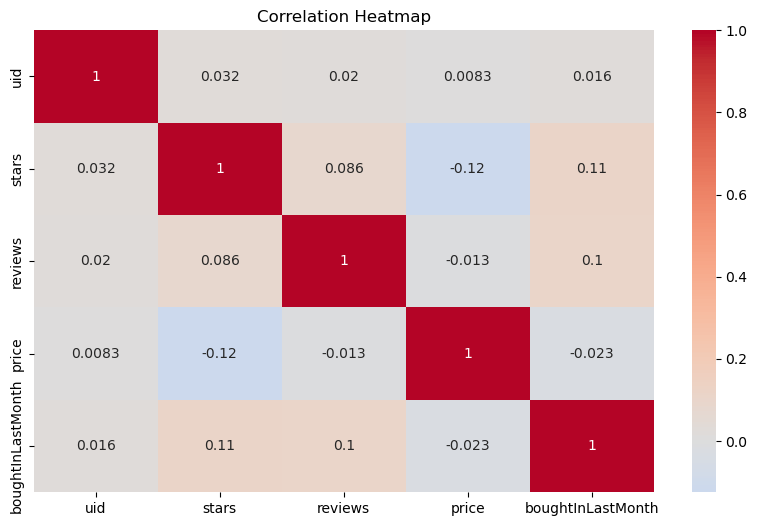

In [31]:
# Exclude non-numeric columns from the correlation calculation
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

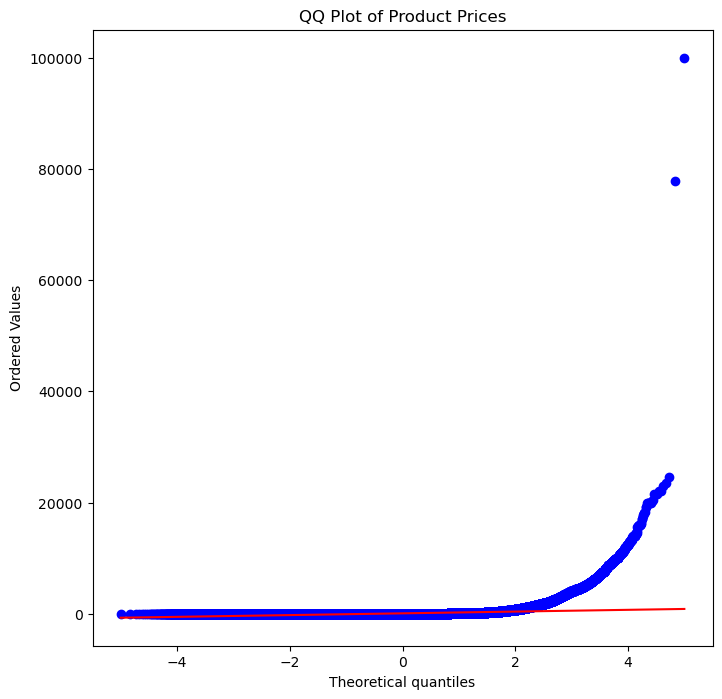

In [32]:
# Examine if product prices typically follow a normal distribution using a QQ plot.

import scipy.stats as stats

# Create a QQ plot to examine the distribution of product prices

plt.figure(figsize=(8, 8))

stats.probplot(df['price'], dist='norm', plot=plt)

plt.title('QQ Plot of Product Prices')

plt.show()

# The QQ plot shows that the distribution of product prices deviates from a normal distribution, particularly at the tails.
